In [5]:
import prophet
import plotly
import pandas as pd


In [11]:
data=pd.read_csv("/users/2024/ds2/123009263/Téléchargements/Crypto.csv", skiprows=[0])


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29061 entries, 0 to 29060
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unix Timestamp  29061 non-null  float64
 1   Date            29061 non-null  object 
 2   Symbol          29061 non-null  object 
 3   Open            29061 non-null  float64
 4   High            29061 non-null  float64
 5   Low             29061 non-null  float64
 6   Close           29061 non-null  float64
 7   Volume BTC      29061 non-null  float64
 8   Volume USD      29061 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.0+ MB


In [17]:
from datetime import datetime

Date=data["Unix Timestamp"].apply(lambda x : datetime.fromtimestamp(x))
data["Date"]=Date

In [21]:
data= data[["Date","Open","High","Low","Close"]]
plotly(data)

TypeError: 'module' object is not callable

In [27]:
import plotly.graph_objs as go
Fig= go.Figure(data=[go.Candlestick(x=data['Date'], open=data['Open'], high=data['High'], low=data["Low"], close=data["Close"])])

Fig.update_layout(xaxis=dict(title="Cours BTC/USD"), xaxis_rangeslider_visible=False)
Fig.show()

In [32]:
data['TypePrice']=(data["Close"]+data["High"]+data["Low"])/3

In [33]:
G1= go.Scatter(x=data["Date"], y= data["Low"], mode='lines', name="low")
G2= go.Scatter(x=data["Date"], y= data["High"], mode='lines', name="high")
G3= go.Scatter(x=data["Date"], y= data["TypePrice"], mode='lines', name="typePrice")


layout=dict(title="bitcon prices", xaxis=dict(rangeslider=dict(visible=True)), type="Date" )

from plotly.offline import iplot




In [35]:
dataFP=data.reset_index().rename(columns={'Date':'ds', 'TypePrice':'y'})
from prophet import Prophet

ModFP= Prophet(interval_width= 0.95)
ModFP.fit(dataFP)

15:10:26 - cmdstanpy - INFO - Chain [1] start processing
15:11:03 - cmdstanpy - INFO - Chain [1] done processing


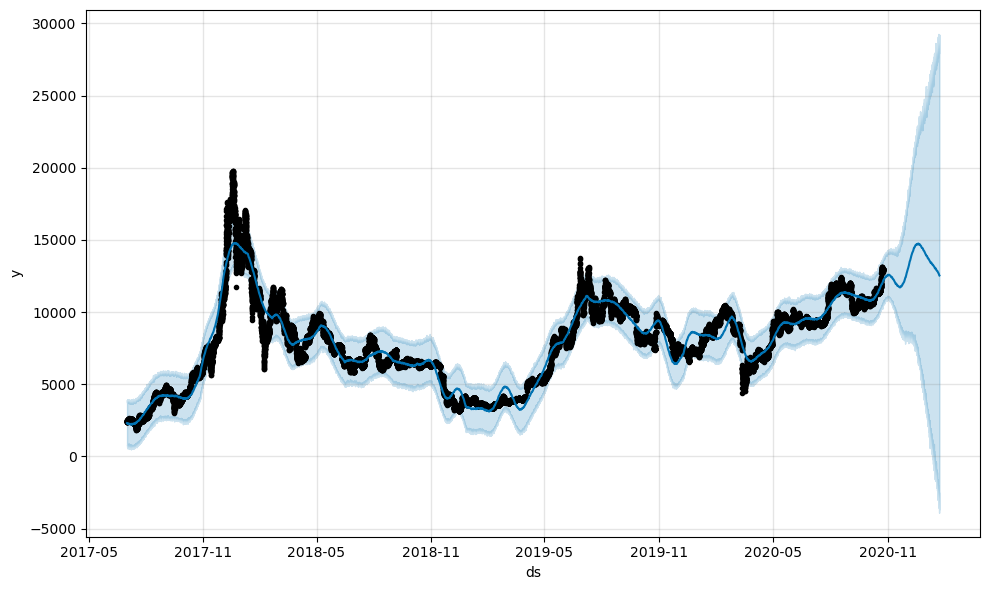

In [42]:
FutureDates=ModFP.make_future_dataframe(periods=3*24*30, freq='H')
Pred = ModFP.predict(df=FutureDates)

Fig= ModFP.plot(Pred)

In [39]:
Pred

ds         trend   yhat_lower    yhat_upper  \
0     2017-07-01 13:00:00   3001.437840   782.806306   3874.845679   
1     2017-07-01 14:00:00   3001.609347   728.610699   3807.845452   
2     2017-07-01 15:00:00   3001.780854   690.423642   3965.367860   
3     2017-07-01 16:00:00   3001.952361   815.388822   3928.765665   
4     2017-07-01 17:00:00   3002.123868   664.635929   3910.082818   
...                   ...           ...          ...           ...   
31208 2021-01-22 05:00:00  11570.037528 -1319.642918  27271.285091   
31209 2021-01-22 06:00:00  11570.304285 -1275.007664  27244.249844   
31210 2021-01-22 07:00:00  11570.571041 -1192.014787  27397.364723   
31211 2021-01-22 08:00:00  11570.837798 -1506.185379  27051.606201   
31212 2021-01-22 09:00:00  11571.104554 -1534.851297  27623.868435   

       trend_lower   trend_upper  additive_terms  additive_terms_lower  \
0      3001.437840   3001.437840     -695.893297           -695.893297   
1      3001.609347   3001.609347     -695.154091           -695.154091   
2      3001.780854   3001.780854     -695.143478           -695.143478   
3      3001.952361   3001.952361     -696.273591           -696.273591   
4      3002.123868   3002.123868     -698.309461           -698.309461   
...            ...           ...             ...                   ...   
31208 -2166.493569  26364.417613      974.170476            974.170476   
31209 -2175.037632  26373.760523      969.438390            969.438390   
31210 -2183.581695  26383.103433      966.320896            966.320896   
31211 -2192.125758  26392.446343      963.934663            963.934663   
31212 -2200.669821  26401.789254      961.459468            961.459468   

       additive_terms_upper     daily  ...     weekly  weekly_lower  \
0               -695.893297 -3.845391  ...  30.601202     30.601202   
1               -695.154091 -2.559276  ...  30.664058     30.664058   
2               -695.143478 -1.704853  ...  30.430474     30.430474   
3               -696.273591 -1.700820  ...  29.906978     29.906978   
4               -698.309461 -2.321783  ...  29.103107     29.103107   
...                     ...       ...  ...        ...           ...   
31208            974.170476 -1.600127  ... -39.906237    -39.906237   
31209            969.438390 -3.225147  ... -39.445629    -39.445629   
31210            966.320896 -3.515088  ... -38.701893    -38.701893   
31211            963.934663 -3.351764  ... -37.676587    -37.676587   
31212            961.459468 -3.550939  ... -36.374211    -36.374211   

       weekly_upper       yearly  yearly_lower  yearly_upper  \
0         30.601202  -722.649109   -722.649109   -722.649109   
1         30.664058  -723.258873   -723.258873   -723.258873   
2         30.430474  -723.869098   -723.869098   -723.869098   
3         29.906978  -724.479749   -724.479749   -724.479749   
4         29.103107  -725.090785   -725.090785   -725.090785   
...             ...          ...           ...           ...   
31208    -39.906237  1015.676840   1015.676840   1015.676840   
31209    -39.445629  1012.109166   1012.109166   1012.109166   
31210    -38.701893  1008.537877   1008.537877   1008.537877   
31211    -37.676587  1004.963014   1004.963014   1004.963014   
31212    -36.374211  1001.384619   1001.384619   1001.384619   

       multiplicative_terms  multiplicative_terms_lower  \
0                       0.0                         0.0   
1                       0.0                         0.0   
2                       0.0                         0.0   
3                       0.0                         0.0   
4                       0.0                         0.0   
...                     ...                         ...   
31208                   0.0                         0.0   
31209                   0.0                         0.0   
31210                   0.0                         0.0   
31211                   0.0                         0.0   
31212                 